In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive/Colab\ Notebooks/

 Assignment1.ipynb
 Assignment1-part2.ipynb
'Copy of Course 1 - Part 8 - Lesson 2 - Notebook.ipynb'
'Copy of Course 1 - Part 8 - Lesson 3 - Notebook.ipynb'
'Copy of Course 2 - Part 4 - Lesson 2 - Notebook (Cats v Dogs Augmentation).ipynb'
'Copy of Course 2 - Part 6 - Lesson 3 - Notebook (1).ipynb'
'Copy of Course 2 - Part 6 - Lesson 3 - Notebook.ipynb'
'IMDB Dataset.csv'


In [39]:
# Read CSV File
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv")

In [40]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [42]:
# Print at least two movie reviews from each class of the dataset, for a sanity check that
# labels match the text
for cls in df['sentiment'].unique():
  print("=====================================================")
  print("Printing sample (2) movie reivews for class : -->>",cls)
  print("=====================================================")
  print(df[df['sentiment'] == cls]['review'].head(2))

Printing sample (2) movie reivews for class : -->> positive
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
Name: review, dtype: object
Printing sample (2) movie reivews for class : -->> negative
3    Basically there's a family where a little boy ...
7    This show was an amazing, fresh & innovative i...
Name: review, dtype: object


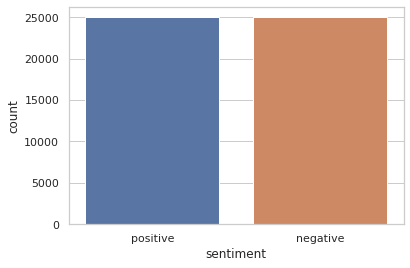

In [43]:
#Plot a bar graph of class distribution in a dataset. Each bar depicts the number of tweets
# belonging to a particular sentiment. (recommended - matplotlib/seaborn libraries)

sns.set_theme(style="whitegrid")
ax = sns.countplot(data=df, x="sentiment")

In [ ]:
# Print the shapes of train and test data


### Data Pre-processing (different way)

In [ ]:
# Data Pre-processing

# Need for this Step - Since the models we use cannot accept string inputs or cannot be of
# the string format. We have to come up with a way of handling this step. The discussion of
# different ways of handling this step is out of the scope of this assignment.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# pre-process review
english_stops = set(stopwords.words('english')) # declare stop words
df['review'] = df['review'].replace({'<.*?>': ''}, regex = True) # remove html tag
df['review'] = df['review'].replace({'[^A-Za-z]': ' '}, regex = True) # remove non alphabet
df['review'] = df['review'].apply(lambda review: [w for w in review.split() if w not in english_stops]) # remove stop words
df['review'] = df['review'].apply(lambda review: [w.lower() for w in review]) # lower case

# encode sentiment
df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', 0)

# print dataset
df.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",1
1,"[a, wonderful, little, production, the, filmin...",1


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Hyperparams

vocab_size = 10000
embedding_dim = 16
max_len = 250
trunc_typ = 'post'
pad_typ = 'post'
oov_tok = '<OOV>'

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size ,oov_token=oov_tok)

In [ ]:
tokenizer.fit_on_texts(df['review'])
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(df['review'])

In [ ]:
df['review_len'] = 0
df['review_len'] = df['review'].map(lambda x: len(x))

In [ ]:
df.head(2)

,review,sentiment,review_len
0,"[one, reviewers, mentioned, watching, oz, epis...",1,176
1,"[a, wonderful, little, production, the, filmin...",1,93


In [ ]:
len(df.review[0])

176

In [ ]:
df.describe()

,sentiment,review_len
count,50000.000000,50000.000000
mean,0.500000,129.720560
std,0.500005,96.151423
min,0.000000,4.000000
25%,0.000000,71.000000
50%,0.500000,97.000000
75%,1.000000,158.000000
max,1.000000,1481.000000


In [ ]:
# Check how much sequences are covered fully under 250 words

len(df[df.review_len <= max_len])

44870

In [ ]:
# Set Pad Sequences

padded_seq = pad_sequences(sequences, maxlen=max_len, padding=pad_typ, truncating=trunc_typ)

In [ ]:
print("\n Sample Review = ", df.review[0])
print("\n Sample Sequences = ", sequences[0])
print("\n Sample Padded Sequences = ", padded_seq[0])


 Sample Review =  ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'they', 'right', 'exactly', 'happened', 'the', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'this', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'its', 'hardcore', 'classic', 'use', 'word', 'it', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'i', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictur

In [ ]:
df['padded_seq'] = padded_seq.tolist()
df.head(2)

,review,sentiment,review_len,padded_seq
0,"[one, reviewers, mentioned, watching, oz, epis...",1,176,"[6, 1977, 974, 67, 3009, 305, 3123, 110, 114, ..."
1,"[a, wonderful, little, production, the, filmin...",1,93,"[40, 300, 49, 260, 3, 1290, 2901, 1, 73, 11, 2..."


In [19]:
# encode sentiment
df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', 0)

x_data = padded_seq[:35000]
x_label = df['sentiment'][:35000]
y_data = padded_seq[35000:]
y_label = df['sentiment'][35000:]

NameError: ignored

### **After loading directly jump to here...**

In [57]:
import pandas as pd
import numpy as np
import random

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

#make some random data
reset_random_seeds()

In [44]:
# encode sentiment
df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', 0)

df['review'] = df['review'].replace({'<.*?>': ''}, regex = True) # remove html tag
df['review'] = df['review'].replace({'[^A-Za-z]': ' '}, regex = True) # remove non alphabet


x_data = df['review'][:35000]
x_label = df['sentiment'][:35000]
y_data = df['review'][35000:]
y_label = df['sentiment'][35000:]
# print(list(x_data[0:5]))
# print(list(x_label[0:5]))

In [45]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
# embeddings = embed(["cat is on the mat", "dog is in the fog"])
# embeddings = embed(df[:35000])

In [58]:
# Model layer
hub_layer = hub.KerasLayer(embed, input_shape=[], dtype=tf.string)
model = tf.keras.Sequential([
                             hub_layer,
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(8,activation='relu'),
                            #  tf.keras.layers.Dense(16,activation='relu'),
                            #  tf.keras.layers.Dense(8,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [59]:
# # Model layer
# model = tf.keras.Sequential([
#                              tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
#                              tf.keras.layers.Flatten(),
#                              tf.keras.layers.Dense(6,activation='relu'),
#                              tf.keras.layers.Dense(1,activation='sigmoid')
# ])

In [60]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 124,651,473
Trainable params: 8,785
Non-trainable params: 124,642,688
_________________________________________________________________


In [63]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [62]:
history = model.fit(x_data,
          x_label,
          epochs=30,
          validation_data=(y_data, y_label),
          callbacks=[callback]
          )

Epoch 1/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.5003 - accuracy: 0.7651 - val_loss: 0.4184 - val_accuracy: 0.8093
Epoch 2/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3987 - accuracy: 0.8249 - val_loss: 0.3814 - val_accuracy: 0.8311
Epoch 3/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3884 - accuracy: 0.8266 - val_loss: 0.3776 - val_accuracy: 0.8329
Epoch 4/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.3816 - accuracy: 0.8298 - val_loss: 0.3757 - val_accuracy: 0.8335
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3769 - accuracy: 0.8307 - val_loss: 0.3804 - val_accuracy: 0.8293
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3706 - accuracy: 0.8322 - val_loss: 0.3885 - val_accuracy: 0.8265
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3654 - accuracy: 0.8382 - val_loss: 0.3829 - val_accuracy:

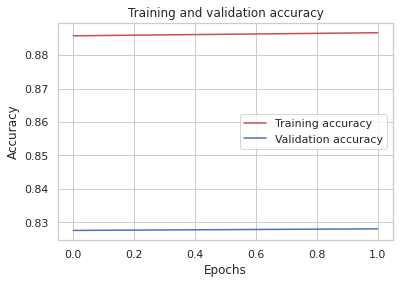

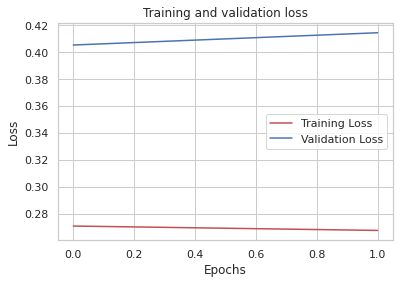

<Figure size 432x288 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Accuracy history graph for training and validation
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()

# Loss history graph for training and validation
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.figure()

# show plot
plt.show()